In [2]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
import networkx as nx
n = 1000
points = np.random.rand(n, 2)
# init solutions = 1 with p=0.1
solutions = np.random.choice([0, 1], size=n, p=[0.9, 0.1])
gain = [0 if i == 0 else np.random.rand() + 1 for i in solutions]
loss = [0 if i == 1 else np.random.rand() for i in solutions]
connection_matrix = kneighbors_graph(points, n_neighbors=3, mode="connectivity").toarray()
print(connection_matrix)
solution_matrix = (solutions)[:, None] ^ (solutions)[None, :]
gain_loss_matrix = np.logical_and(np.array(gain)[:, None] > np.array(loss)[None, :], np.array(loss)[None, :])
print(gain)
print(loss)
print(gain_loss_matrix)

final_matrix = np.logical_and(connection_matrix, np.logical_or(gain_loss_matrix, connection_matrix))

G = nx.from_numpy_matrix(final_matrix)
print(len(G.edges()))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0, 1.3065473509668304, 0, 0, 0, 0, 0, 0, 0, 0, 1.0119895121655276, 0, 0, 0, 1.8436509672479273, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.1267322635704136, 0, 0, 0, 0, 0, 0, 0, 0, 1.7347805051324074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.8483172051875574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.5343659059282944, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3037638449483402, 0, 0, 0, 0, 1.3504727008855124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.2921978917216865, 0, 0, 0, 1.108479378407742, 1.653393678507642, 0, 0, 1.0881684264537401, 0, 0, 0, 0, 1.0623021918455655, 0, 1.875191256591029, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.6073341680760638, 0, 0, 0, 1.9805523895709318, 0, 0, 1.403634942312521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1

In [50]:
# init 10 points 
n = 5
import numpy as np
from sklearn.metrics import pairwise_distances

points = np.random.rand(n, 2)
distance_matrix = pairwise_distances(points)
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = np.linalg.norm(points[i] - points[j])
        
solution = np.random.choice([False, True], size=n, p=[0.5, 0.5])
print(solution)
distance2solution = distance_matrix[:, solution]
mmin = np.partition(distance2solution, 2, axis=-1)[:,:2]
argpartition = np.argpartition(distance2solution, 2, axis=-1)[:,:2]
print(argpartition)
mmin_arg = distance_matrix[:, solution][np.arange(n)[:, None], argpartition]
# print(distance_matrix)
print(distance2solution)
print(mmin)
# print(argpartition)
print(mmin_arg)

[ True False  True  True  True]
[[0 2]
 [2 1]
 [1 2]
 [2 1]
 [3 1]]
[[0.         0.65806633 0.43679866 0.78755153]
 [0.38478979 0.28579072 0.1175966  0.54196134]
 [0.65806633 0.         0.31616109 0.3822108 ]
 [0.43679866 0.31616109 0.         0.63191089]
 [0.78755153 0.3822108  0.63191089 0.        ]]
[[0.         0.43679866]
 [0.1175966  0.28579072]
 [0.         0.31616109]
 [0.         0.31616109]
 [0.         0.3822108 ]]
[[0.         0.43679866]
 [0.1175966  0.28579072]
 [0.         0.31616109]
 [0.         0.31616109]
 [0.         0.3822108 ]]


In [8]:
# init 10 points 
n = 10
import numpy as np
from sklearn.metrics import pairwise_distances

points = np.random.rand(n, 2)
distance_matrix = pairwise_distances(points)
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = np.linalg.norm(points[i] - points[j])
        
solution = np.random.choice([False, True], size=n, p=[0.5, 0.5])
m = distance_matrix[:, solution][solution, :]
mmin = np.partition(m, 2, axis=-1)[:,1]
restore = np.zeros((n, n))
restore[:, solution] = mmin

print(distance_matrix)
print(solution)
print(m)
print(mmin)
print(restore)

# 将mmin按照solution恢复原尺寸，false的位置补0列，true的位置补mmin


[[0.         0.21715016 0.33132471 0.19052463 0.54986648 0.41810508
  0.75511092 0.19542409 0.50229276 0.3868646 ]
 [0.21715016 0.         0.35967329 0.3556269  0.75465908 0.42573686
  0.92832302 0.39362976 0.68397764 0.4859949 ]
 [0.33132471 0.35967329 0.         0.51429654 0.58080672 0.08766521
  1.03866136 0.49096679 0.78676377 0.71801827]
 [0.19052463 0.3556269  0.51429654 0.         0.55490601 0.60192552
  0.57544324 0.07961631 0.32839122 0.21350254]
 [0.54986648 0.75465908 0.58080672 0.55490601 0.         0.63075728
  0.7194792  0.4754162  0.54633061 0.72183098]
 [0.41810508 0.42573686 0.08766521 0.60192552 0.63075728 0.
  1.12283786 0.57809215 0.87181293 0.80495882]
 [0.75511092 0.92832302 1.03866136 0.57544324 0.7194792  1.12283786
  0.         0.56159289 0.25405459 0.48903412]
 [0.19542409 0.39362976 0.49096679 0.07961631 0.4754162  0.57809215
  0.56159289 0.         0.3078841  0.27326372]
 [0.50229276 0.68397764 0.78676377 0.32839122 0.54633061 0.87181293
  0.25405459 0.30788

In [27]:
a = [1]
print(a)
print(list(a))

[1]
[1]


In [4]:
import numpy as np
import networkx as nx
solution1 = [False, True, False, True]
solution2 = [True, False, True, False]

# solution_matrix[i][j] = 1 if solution1[i] and !solution2[j]
solution_matrix  = np.logical_and(np.array(solution1)[:, None], np.logical_not(np.array(solution2)[None, :]))


[[False  True False  True]
 [ True False  True False]
 [False  True False  True]
 [ True False  True False]]
[(0, 1), (0, 3), (1, 2), (2, 3)]


In [9]:
# random nxn bool
n = 10
solution_matrix = np.random.choice([False, True], size=(n, n), p=[0.5, 0.5])
print(solution_matrix)

# if solution_matrix[i][j] == 1, then solution_matrix[j][i] = 1
solution_matrix = np.logical_or(solution_matrix, solution_matrix.T)

[[ True False  True False  True  True False  True  True False]
 [ True  True False  True False False False False False False]
 [ True False False  True False  True False  True False False]
 [ True False False  True False  True  True  True  True False]
 [False False  True False False False False False  True False]
 [False False False False False  True  True False False  True]
 [ True False  True False False  True False  True  True  True]
 [False  True  True  True  True False  True False False False]
 [False  True  True  True False  True False False False  True]
 [False  True  True False False  True False  True  True  True]]


In [1]:
a = [
    [True, False, True, False, True],
    [False, True, True, False, False],
    [True, True, True, False, False],
    [False, False, False, True, True]
]

result = [sum(sublist) for sublist in zip(*a)]
print(result)


[2, 2, 3, 1, 2]


In [72]:
# rand 4 to 6
import numpy as np
n = 10
m = 5
a = np.random.rand(n, m) * 200
print(a)

[[ 71.41590974 136.395999   107.69667527 113.67004198 121.34052811]
 [  8.24500825  16.66169284 150.51499016 100.86207765 189.98448317]
 [ 47.46595456   0.83386271   8.11927175  14.5288237   82.16321367]
 [149.58413362 118.14886729 126.25917039 159.2670266   12.87411618]
 [ 58.30716684 115.2976154   20.11650907   0.91643344 199.49830585]
 [189.70973312  29.17579981  93.34984535 144.49503616 108.74375928]
 [ 66.61164501 167.19244399 139.38867947  52.12149803  23.92542262]
 [124.99918862 171.27254716 176.59560018 123.54288949  61.2720056 ]
 [ 62.94516036 112.18738057 157.45099897  43.03534539 192.60239645]
 [ 69.50587057  60.4803078  159.78661763  69.47100966 147.72643729]]


In [62]:
# open /data2/suhongyuan/flp/gurobi_result/2013_123.pkl
import pickle
with open("/data2/suhongyuan/flp/gurobi_result/2000_200.pkl", "rb") as f:
    result = pickle.load(f)
    print(result)

[20.24185503]


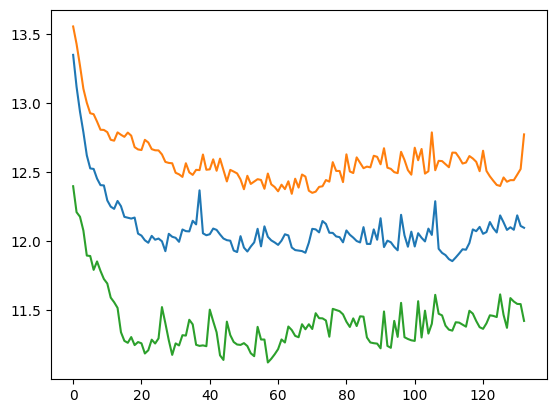

In [95]:
import pickle

data_path1 = '/data2/suhongyuan/flp/output/dg-agent-rl-gnn-seed-1_1/best-models/eval_500_44_1.pkl'
data_path2 = '/data2/suhongyuan/flp/output/dg-agent-rl-gnn-seed-1_1/best-models/eval_500_44_19.pkl'
data_path3 = '/data2/suhongyuan/flp/output/dg-agent-rl-gnn-seed-1_1/best-models/eval_500_44_21.pkl'
data1 = pickle.load(open(data_path1, 'rb'))
data2 = pickle.load(open(data_path2, 'rb'))
data3 = pickle.load(open(data_path3, 'rb'))
# best_data[i] = max(data1[:i+1])
# plot data123
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data1, label='1')
plt.plot(data2, label='2')
plt.plot(data3, label='3')